---
title: Ab initio methods in solid state physics
subtitle: "X. Lattice dynamics - anharmonicity"
author: 
  - Przemysław Piekarz
  - Paweł T. Jochym

institute:   
  - "*Department of Computational Material Science*"
  - "*Institute of Nuclear Physics, Polish Academy of Sciences*"

institute-short: NZ33, INP PAS
format:
  beamer:
    fontsize: 10pt
    fontfamily: libertine
    template-partials:
      - aux/title.tex
    aspectratio: 1610
    theme: Madrid
    date: last-modified
    date-format: long
    output-file: "Ab_initio_lecture_10"
  revealjs:
    output-file: "Ab_initio_lecture_10"
    theme: 
      - default
      - aux/reveal_theme.scss
    center: false
    smaller: false
    slide-number: true
    footer: "Ab initio methods in solid state physics, X"
    template-partials:
      - aux/title-slide.html
      
---

## Anharmonic lattice dynamics[^AAM] [^BH]

* Harmonic oscillator
* Why anhamonicity?
* Quartic oscillator
* Anharmonic perturbation theory
* Phonon life times
* Lattice thermal conductivity

[^AAM]: A. A. Maradudin, *Theory of Lattice Dynamics in the Harmonic Approximation* (New York :, 1963.)
[^BH]: M. Born and K. Huang, *Dynamical Theory of Crystal Lattices* (Oxford University Press, 1988)

## Harmonic oscillator

Classic harmonic oscillator with mass $m$ and frequency $\omega$ is governed by the quadratic potential:
$$
V(u)=\frac{m\omega^2}{2}u^2 
$$

where $u$ is the displacement from the equilibrium position. The solution of the equation of motion for this potential is an oscillating motion $u(t) = A \sin(\omega t + \phi)$, where frequency and phase ($\phi$) are *constant* and are independent from amplitude ($A$). This solution is just a single, constant Fourier component (Dirac delta) when transformed to frequency domain. This reminds us of the solution of the harmonic approximation for the crystal from the previous lecture:

$$
\omega^2(\mathbf{q}) \varepsilon_{i\alpha} = 
    \sum_{i'\alpha'} D_{i\alpha}^{i'\alpha'}(\mathbf{q}) \varepsilon_{i'\alpha'}
$$

where the dynamical matrix $D_{i\alpha}^{i'\alpha'}(\mathbf{q})$ is a function of wave vector $\mathbf{q}$.

## Why we need anharmonicity?

$$
\omega^2(\mathbf{q}) \varepsilon_{i\alpha} = 
    \sum_{i'\alpha'} D_{i\alpha}^{i'\alpha'}(\mathbf{q}) \varepsilon_{i'\alpha'}
$$

Consequences:

- phonon modes are *independent*,
- frequencies are constant with temperature,
- no interaction between modes $\Rightarrow$ **no thermal equilibrium (!!)**,
- "ballistic" thermal transport without resistance,
- no phase transitions.

\begin{center}
\textbf{There are no harmonic crystals in nature!}
\end{center}

## Quartic oscillator

$$
V(u)=\frac{m\omega^2}{2}u^2 + \frac{\lambda}{4}u^4,
$$

which leads to the equation of motion:

$$
m \ddot{u} + m \omega^2 u + \lambda u^3 = 0.
$$

which has a solution:[^JL] $u(t)=A \text{cn}(t \Omega, \mu)$
, where $\text{cn}$ is an elliptic Jacobi function and 

$$
\Omega=\sqrt{\omega^2 +\frac{\lambda}{m}A^2}
\;\; ; \;\;
\mu=\sqrt{\frac{\lambda}{2 m}\left(\frac{A}{\Omega}\right)^2}
$$

[^JL]: P.T. Jochym, J. Łażewski, W. Szuszkiewicz; [Scientific Reports 10, 19783 (2020)](https://doi.org/10.1038/s41598-020-76454-y)]

---

::: {.content-visible when-format="reveal"}

```python
from scipy.special import ellipj
from numpy import linspace, exp, cos
from matplotlib.pylab import plot, legend, figure
from ipywidgets import interact, fixed 

x = linspace(0,20,100)
@interact(u=fixed(x), m=(0,1,0.01))
def ejf(u,m):
    figure(figsize=(10,7))
    plot(u, cos(u), ':', label='cos(t)')
    l = 1-exp(1-1/(1-m))
    plot(u, ellipj(u,l)[1], label=f'cn(t,{l:5.3f})')
    legend(loc='lower left');
```

:::

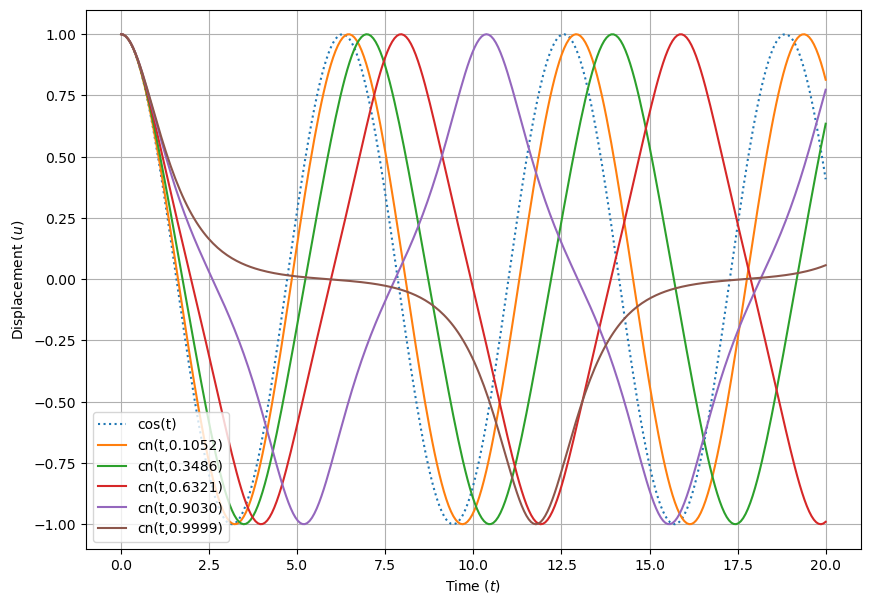

In [ ]:
#| fig-align: center
#| code-hide: true
# ::: {.content-visible when-format="beamer"}
from scipy.special import ellipj
from numpy import linspace, exp, cos
from matplotlib.pylab import plot, legend, figure, xlabel, ylabel, grid


figure(figsize=(10,7))
u = linspace(0,20,300)
plot(u, cos(u), ':', label='cos(t)')
for m in linspace(0.1,0.9,5):
    l = 1-exp(1-1/(1-m))
    plot(u, ellipj(u,l)[1], label=f'cn(t,{l:5.4f})')
xlabel('Time ($t$)')
ylabel('Displacement ($u$)')
grid()
legend(loc='lower left');

## Energy of the crystal

Potential energy of the lattice can be expanded as a function of the atomic displacements $s_{n i\alpha}$, where $\alpha=x,y,z$, (assuming small vibrations and negligible quantum effects): 

$$
      V(s) = V_0 +  
    \frac{1}{2}\sum_{n i\alpha}\sum_{n' i'\alpha'}
        \left. \frac{\partial^2 V}{\partial s_{n i\alpha}\partial s_{n' i'\alpha'}}\right|_{s=0} s_{n i\alpha} s_{n' i'\alpha'} + O(s^3)
$$

The linear term vanishes due to the equilibrium point assumption. The quadratic term determines the behavior of the crystal in the small-vibrations regime investigated previously. The $O(s^3)$ is the subject of our following considerations. If $U(s)=V(s)-V_0$:

$$
U(s) = \sum\limits_{p=2}^{\infty} U_p 
 = \sum\limits_{p=2}^{\infty}\frac{1}{p!}\sum\limits_{[n,i,\alpha]}\Phi(n_1 i_1\alpha_1;\ldots;n_p i_p\alpha_p) s_{n_1 i_1\alpha_1}\cdots s_{n_p i_p\alpha_p}
$$

## Anharmonic perturbation theory

If $U_3, U_4$ are small compared to $U_2$, the complete Hamiltonian $H=H_0+H'$ may be treated as perturbation of the non-interacting Hamiltonian $H_0$:

$$
H\approx H_0+U_2+U_3
$$

If $\mathbf{G}_q(\omega)$ is a one-phonon Green's function for the full Hamiltonian and $\mathbf{G}^0_q(\omega)$ is a Green's function for the non-interacting Hamiltonian $H_0$, then we can write following Dyson equation:

$$
[\mathbf{G}_q(\omega)]^{-1} = [\mathbf{G}^0_q(\omega)]^{-1} - \Sigma_q(\omega)
$$

where $\Sigma_q(\omega)$ is an anharmonic self-energy. If this correction is sufficiently small and $\hbar\omega_q \gg |{\Sigma}_q(\omega_q)|$ the changes in phonon spectrum may be described by frequency shift $\Delta_q$ and linewidth $\Gamma_q$:

$$
\Delta_q = -\frac{1}{\hbar}\mathrm{Re}\, {\Sigma}_q(\omega_q) \;  ; \; \; \;
\Gamma_q = \frac{1}{\hbar}\mathrm{Im}\, {\Sigma}_q(\omega_q) 
$$

## Third order anharmonic self-energy

![](aux/diag_phi3.svg){width="50%" fig-align="center"}

$$
\Sigma^{TP}_q=-\frac{1}{\hbar}\sum\limits_{q',j}
V(-q;q;\mathbf{0}j)
V(\mathbf{0}j;q';q') \frac{2n+1}{\omega_{\mathbf{0}j}} \; ; \;\;\;
V(q_1;\ldots;q_n) = \left(\frac{\hbar}{2}\right)^{n/2}
\frac{\Phi(q_1;\ldots;q_n)}{\sqrt{\omega_{q_1}\cdots\omega_{q_n}}}
$$

Phonon linewidth:

$$
\Gamma^{\mathrm{anh}}_{\boldsymbol{q}j}(\omega) = \frac{\pi}{2\hbar^{2}}\sum_{\boldsymbol{q}_{1},\boldsymbol{q}_{2}}\sum_{j_{1},j_{2}}
     |V^{(3)}_{-\boldsymbol{q}j,\boldsymbol{q}_{1}j_{1},\boldsymbol{q}_{2}j_{2}}|^{2} 
      \times \left[ (n_{1}+n_{2} + 1)( \delta{(\omega - \omega_{1} - \omega_{2})-\delta{(\omega + \omega_{1} + \omega_{2})}}) \right. 
$$
$$
      \left. \hspace{14em} (n_{1}-n_{2})(\delta{(\omega + \omega_{1} - \omega_{2})}-\delta{(\omega - \omega_{1} + \omega_{2})})\right]
$$

## Fourth order anharmonic self-energy

![](aux/diag_phi4.svg){width="80%" fig-align="center"}

$$
\Sigma^\mathrm{loop}_q=-\sum\limits_{q'}
V(q;-q;q';-q')
\frac{2n+1}{2}
$$

## Lattice thermal conductivity

The lattice thermal conductivity tensor $\kappa_{\mathrm{ph}}^{\mu\nu}(T)$

$$
\kappa_{\mathrm{ph}}^{\mu\nu}(T) = \frac{1}{V N_{q}} \sum_{\boldsymbol{q},j}c_{\boldsymbol{q}j}(T)v_{\boldsymbol{q}j}^{\mu}v_{\boldsymbol{q}j}^{\nu}\tau_{\boldsymbol{q}j}(T),
$$

where $V$ is the unit cell volume, $c_{\boldsymbol{q}j} = \hbar\omega_{\boldsymbol{q}j}\partial n_{\boldsymbol{q}j}/\partial T$, and $\tau_{\boldsymbol{q}j}(T)$ is the phonon lifetime. The phonon lifetime is estimated using the Matthiessen's rule as:

$$
\tau_{\boldsymbol{q}j}^{-1}(T) = 2 (\Gamma_{\boldsymbol{q}j}^{\mathrm{anh}}(T) + \Gamma_{\boldsymbol{q}j}^{\mathrm{iso}}).
$$

Bulk thermal conductivity:

$$
\kappa_{\mathrm{ph}}^{\mu\mu} = \frac{1}{V N_{q}}
\int\limits_0^\infty\sum_{\boldsymbol{q},j}c_{\boldsymbol{q}j}v_{\boldsymbol{q}j}^{\mu}v_{\boldsymbol{q}j}^{\mu}\tau_{\boldsymbol{q}j} \delta(\omega-\omega_{\boldsymbol{q}j}) d\omega.
$$

## Anharmonic force constants

- non-linear force-displacement relationship
- large number of independent parameters
- non-linear fitting required (LASSO, NL-LS, genetic algorithms)
- effective implementations exist (ALAMODE, TDEP)


- Expensive post-processing
- Access to multiple experimental parameters:
    - Frequency shifts
    - Phonon lifetimes
    - Line profiles
    - Spectral function
    - Lattice thermal conductivity
    